In [50]:
import os

recording_location = '/home/pestilli/Desktop/antonio/dotmot_py/data/ant_001_2022-11-11_17h36.59.762/000'

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

000/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    surface_definitions_v01
    surfaces.pldata
    surfaces_timestamps.npy
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
    offline_data/
        fixations.meta
        fixations.pldata
        fixations_stop_timestamps.npy
        fixations_timestamps.npy
        

In [51]:
import pandas as pd
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'gaze_positions.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
print("Columns present in pupil data:")
list(gaze_pd_frame.columns)

Columns present in pupil data:


['gaze_timestamp',
 'world_index',
 'confidence',
 'norm_pos_x',
 'norm_pos_y',
 'base_data',
 'gaze_point_3d_x',
 'gaze_point_3d_y',
 'gaze_point_3d_z',
 'eye_center0_3d_x',
 'eye_center0_3d_y',
 'eye_center0_3d_z',
 'gaze_normal0_x',
 'gaze_normal0_y',
 'gaze_normal0_z',
 'eye_center1_3d_x',
 'eye_center1_3d_y',
 'eye_center1_3d_z',
 'gaze_normal1_x',
 'gaze_normal1_y',
 'gaze_normal1_z']

### exclude gaze data before experiment star_time

In [52]:
from IPython.display import display
x = 24 # skip first X seconds to allow for experiment startup
start_time = gaze_pd_frame.gaze_timestamp.iloc[0] + x
gaze_pd_frame = gaze_pd_frame[gaze_pd_frame.gaze_timestamp > start_time]
pd.options.display.float_format = '{:.3f}'.format

display(gaze_pd_frame[['gaze_timestamp', 'confidence', 'norm_pos_x', 'norm_pos_y']])

,gaze_timestamp,confidence,norm_pos_x,norm_pos_y
24,282999.149,1.000,0.473,0.607
25,283000.157,1.000,0.478,0.610
26,283001.157,1.000,0.479,0.599
27,283002.157,1.000,0.481,0.604
28,283003.156,1.000,0.483,0.601
29,283004.156,1.000,0.489,0.600
30,283005.155,1.000,0.488,0.599
31,283006.155,1.000,0.490,0.600
32,283007.163,1.000,0.489,0.599
33,283008.163,1.000,0.487,0.595


### Check what a ~1.5deg jitter window looks like for fixation 

In [53]:
# set screen parameters [CRT]
screen_width = 38 #cm
viewing_distance = 57 #cm
resolution = [1024, 768] #x-pix/y-pix
# set angular radius for jitter
ang = 1.5 # degrees of visual angle (dva)
# convert from degrees of visual angle to pixel coordinates
import numpy
pixSize=screen_width/resolution[0]
sz=2*viewing_distance*numpy.arctan(numpy.pi*ang/(2*180))
pix = numpy.round(sz/pixSize)

#convert from pix to norm units on screen
jitter = 40/resolution[0]


### Plot pupil positions

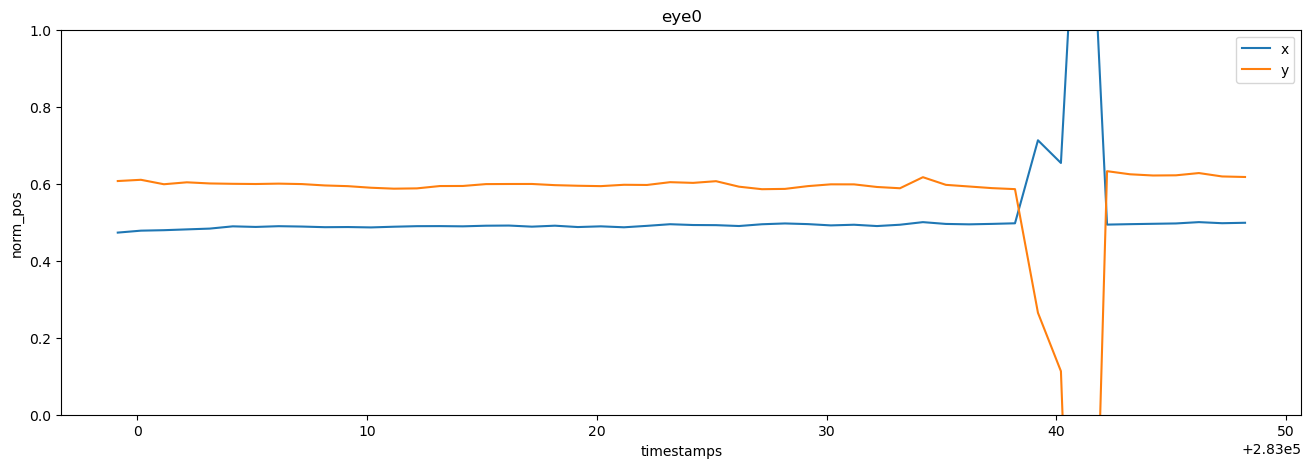

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
plt.plot(gaze_pd_frame['gaze_timestamp'], gaze_pd_frame['norm_pos_x'])
plt.plot(gaze_pd_frame['gaze_timestamp'], gaze_pd_frame['norm_pos_y'])
plt.xlabel('timestamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('eye0')
plt.legend("xy")

### Remove low confidence timestamps

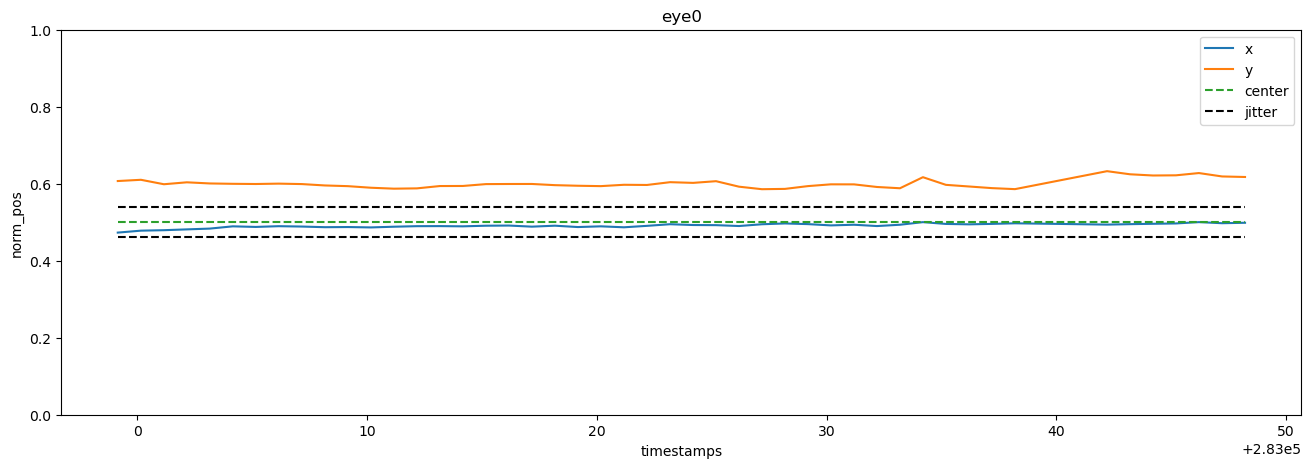

In [56]:
import numpy.matlib
eye0_high_conf_df = gaze_pd_frame[gaze_pd_frame['confidence'] > 0.95]
plt.figure(figsize=(16, 5))
plt.plot(eye0_high_conf_df['gaze_timestamp'], eye0_high_conf_df['norm_pos_x'],label='x')
plt.plot(eye0_high_conf_df['gaze_timestamp'], eye0_high_conf_df['norm_pos_y'],label='y')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5,len(eye0_high_conf_df['gaze_timestamp']),1),'--',label='center')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5+jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='black',label='jitter')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5-jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='black')
plt.xlabel('timestamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('eye0')
plt.legend()

### Visualize in scatter 

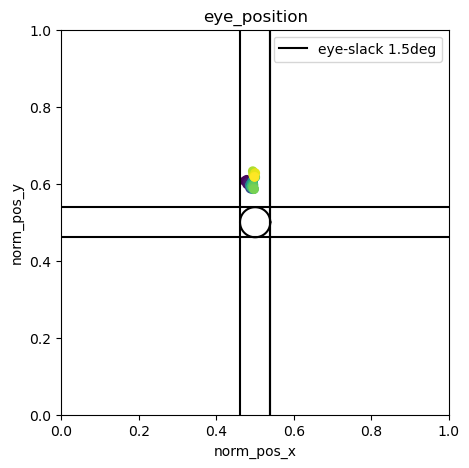

In [57]:
# draw fixation jitter radius
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=0.5     #x-position of the center
v=0.5    #y-position of the center
a=jitter     #radius on the x-axis
b=jitter    #radius on the y-axis

plt.figure(figsize=(5, 5))
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t),color='black',label='eye-slack 1.5deg')

# plot fixation + ellipsis (jitter radius)
plt.scatter(eye0_high_conf_df['norm_pos_x'], eye0_high_conf_df['norm_pos_y'], c=eye0_high_conf_df['gaze_timestamp'])
plt.plot([0.5+jitter,0.5+jitter],[0,1],'-',color='black')
plt.plot([0.5-jitter,0.5-jitter],[0,1],'-',color='black')
plt.plot([0.5+jitter,0.5+jitter],[0,1],'-',color='black')
plt.plot([0,1],[0.5+jitter,0.5+jitter],'-',color='black')
plt.plot([0,1],[0.5-jitter,0.5-jitter],'-',color='black')
plt.plot(0.5+jitter,1,'-',color='black')
#plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye_position')
plt.legend()